In [1]:
# project: p1
# submitter: emanter
# partner: none
# hours: 6

In [2]:
#import statements
import json
import os
import pandas
from subprocess import check_output
import subprocess
import time
import numpy as np

In [3]:
#Q1
type(8/3)

float

In [4]:
#Q2
x = 4
maximum = 15
minimum = 5
error = not x in (minimum, maximum) # False if x is inside the minimum-to-maximum range
error


True

In [5]:
#Q3
word = "QUOTIDIAN"
suffix_match = word.lower()[-3:] == "ian" # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match


True

In [6]:
def check_sum(x=0, y=0, z=0):
    if x + y == z:
        return True
    else:
        return False

In [7]:
#Q4
check_sum(0.1, 0.2, 0.3)

False

In [8]:
#Q5
check_sum(-1, 1)

True

In [9]:
#Q6
x = 4
if x%2 ==1:
    status = "odd"
elif x%2 ==0:
    status = "even"
else:
    status = "non-integer"
status


'even'

In [10]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [11]:
def neg_sum(listy):
    total = 0
    for num in listy:
        if num >0:
            continue
        total += num
        if total <= -20:
            break
    return total

In [12]:
#Q7
neg_sum(nums)

0

In [13]:
#Q8
neg_sum([-5, 1, -11, -6, 15, -1, 8, 2])

-22

In [14]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2, "z" : 4}
coord3 = {"x": 3, "y": 1, "z" : 7}

rows = [
    [1, 6, 7, 8, coord1],
    [3, 4, 9, coord2],
    [5, 2, coord3],
]


In [15]:
#Q9
coord3["w"] = 6
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 4, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [16]:
#Q10
rows[0][-1]["x"]

8

In [17]:
#Q11
import copy
v2 = copy.copy(rows)
v2[0] = 404    # first change
v2[1][1] = 404 # second change
rows


[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [18]:
#Q12
sum1 = 0
for item in rows:
    sum1 += item[header.index("B")]
sum1

412

In [19]:
#Q13
rows.sort(key=lambda item: item[header.index("B")])
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}],
 [1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}]]

In [20]:
#Q14
f = open("usd.json")
data = f.read()
f.close()

print(type(data))
print(data[:300] + "...")

stuff = json.loads(data)
amount = stuff["cad"]["rate"] *1000
amount

<class 'str'>
{"eur":{"code":"EUR","alphaCode":"EUR","numericCode":"978","name":"Euro","rate":0.92003147487614,"date":"Fri, 2 Feb 2024 11:55:01 GMT","inverseRate":1.0869193362484},"gbp":{"code":"GBP","alphaCode":"GBP","numericCode":"826","name":"U.K. Pound Sterling","rate":0.78494838926254,"date":"Fri, 2 Feb 2024...


1338.4640243391

In [21]:
def divide(aa, bb):
    try:
        wanted = aa/bb
        return wanted
    except ZeroDivisionError:
        return float("nan")


In [22]:
#Q15
divide(5, 2)

2.5

In [23]:
#Q16
divide(0, 0)

nan

In [24]:
years = {}
for item in os.listdir("home-computers"):
    if item.endswith(".csv"):
        position = item.find(".")
        year = item[(position-4):position]
        df = pandas.read_csv(os.path.join("home-computers", item), header = 1)
        df = df.set_index("Geographic Area Name")
        years[int(year)] = df

In [25]:
#Q17
sorted(list(years.keys()))

[2017, 2018, 2019, 2020, 2021]

In [26]:
#Q18
years[2021].at["Wisconsin", "Estimate!!Total"]

2401818

In [27]:
#Q19
non = years[2021]["Estimate!!Total!!No Computer"]
non.sum()

8902093

In [28]:
#Q20
((years[2021]["Margin of Error!!Total!!No Computer"])/non).max()

0.07836701790752577

In [29]:
#Q21
mydict = {}
nocom = years[2021]["Estimate!!Total!!No Computer"]
tot = years[2021]["Estimate!!Total"]
mydict["Illinois"] = nocom["Illinois"]/tot["Illinois"]*100
mydict["Indiana"] = nocom["Indiana"]/tot["Indiana"]*100
mydict["Iowa"] = nocom["Iowa"]/tot["Iowa"]*100
mydict["Michigan"] = nocom["Michigan"]/tot["Michigan"]*100
mydict["Minnesota"] = nocom["Minnesota"]/tot["Minnesota"]*100
mydict["Wisconsin"] = nocom["Wisconsin"]/tot["Wisconsin"]*100
mydict

{'Illinois': 7.351100500886871,
 'Indiana': 8.300995843439395,
 'Iowa': 8.302263591069158,
 'Michigan': 7.579772219831928,
 'Minnesota': 6.1777398950248985,
 'Wisconsin': 8.029750797104526}

Text(0, 0.5, '% of Households w/o Computers')

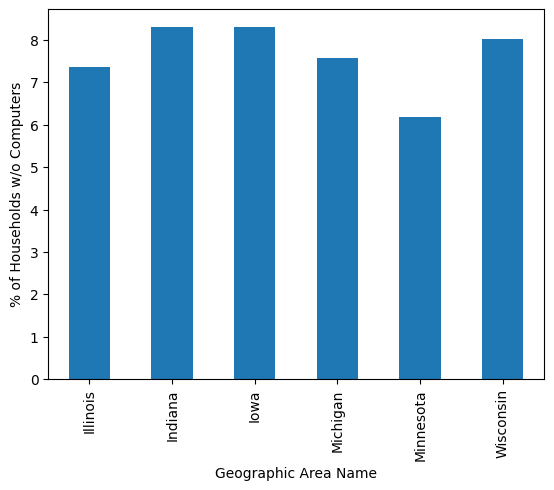

In [30]:
#Q22
p = pandas.Series(mydict).plot.bar()
p.set_xlabel("Geographic Area Name")
p.set_ylabel("% of Households w/o Computers")

Text(0, 0.5, 'WI Households without Computers (thousands)')

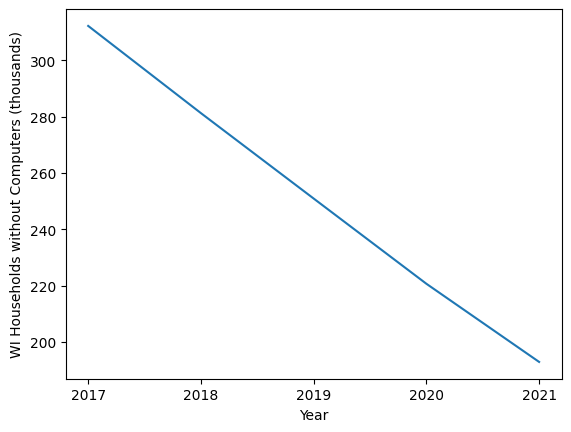

In [31]:
#Q23
d = {}
l = []
for year in years:
    d[year] = (years[year].loc["Wisconsin", "Estimate!!Total!!No Computer"])/1000
    l.append(year)
g = pandas.Series(d).sort_values().plot.line(xticks = l)
g.set_xlabel("Year")
g.set_ylabel("WI Households without Computers (thousands)")

Text(0, 0.5, 'Tablets (millions)')

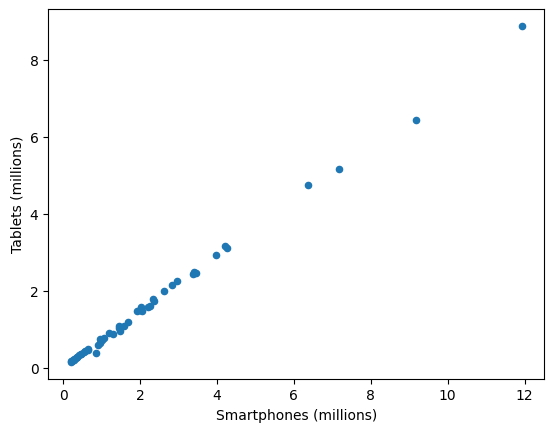

In [32]:
#Q24
df1 = years[2021].copy()
df1["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"] = df1["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"]/1000000
df1["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"] = df1["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]/1000000
s = df1.plot.scatter(x = "Estimate!!Total!!Has one or more types of computing devices!!Smartphone", y = "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer")
s.set_xlabel("Smartphones (millions)")
s.set_ylabel("Tablets (millions)")

In [33]:
#Q25
check_output("git checkout main", cwd = "flask", encoding = "utf-8", shell = True)
stu = check_output("git log", cwd = "flask", encoding = "utf-8", shell = True)
stu1 = stu.split("\n")
stu1[0]

Previous HEAD position was a99e408b Finished jQuery example documentation.
Switched to branch 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [34]:
#Q26
check_output("git checkout main", cwd = "flask", encoding = "utf-8", shell = True)
q26 = check_output("git log", cwd = "flask", encoding = "utf-8", shell = True)
q26a = q26.split("\n")
a = []
for thing in q26a:
    if "commit" in thing:
        a.append(thing)
b = a[-10:]
c = []
for thing in b:
    c.append(thing[7:])
c

Already on 'main'


['a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '33850c0ebd23ae615e6823993d441f46d80b1ff0']

In [35]:
#Q27
check_output("git checkout main", cwd = "flask", encoding = "utf-8", shell = True)
need = a[-100][7:]
check_output("git checkout " + need, cwd = "flask", encoding = "utf-8", shell = True)
f = open(os.path.join("flask", "README"))
data2 = f.read()
f.close()
data2

Already on 'main'
Note: switching to 'a99e408bd109783561d408ef34c286cdd9b51845'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at a99e408b Finished jQuery example documentation.


"\n                          // Flask //\n\n         because sometimes a pocket knife is not enough\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n    ~ Is it ready?\n\n      A preview release is out now, and I'm hoping for some\n      input about what you want from a microframework and\n      how it should look like.  Consider the API to slightly\n      improve over time.\n\n    ~ What do I need?\n\n      Jinja 2.4 and Werkzeug 0.6.1.  `easy_install` will\n      install them for you if you do `easy_install Flask==dev`.\n      I encourage you to use a virtualenv.  Check the docs for\n      complete installation and usage instructions.\n\n    ~ Where are the docs?\n\n      Go to http://flask.pocoo.org/ for a prebuild version of\n      the current documentation.  Otherwise build them yourself\n      from the sphinx sources i

In [36]:
#Q28
j = []
for item in q26a:
    if "Merge pull request" in item and "/" in item:
        item1 = item.split(" ")
        j.append(item1[-1].split("/")[0])
k = {}
for name in j:
    if name not in k:
        k[name] = 1
    elif k[name]:
        k[name] += 1
e = {}
for name in k:
    if k[name] >= 10:
        e[name] = k[name]
e

{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'davidism': 45,
 'untitaker': 20,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [37]:
#Q29
try:
    msg = check_output(["pip3", "instal"], stderr=subprocess.STDOUT, encoding = "utf-8")
except subprocess.CalledProcessError as e:
    msg = e.output
msg

'ERROR: unknown command "instal" - maybe you meant "install"\n'

Text(0, 0.5, 'Milliseconds')

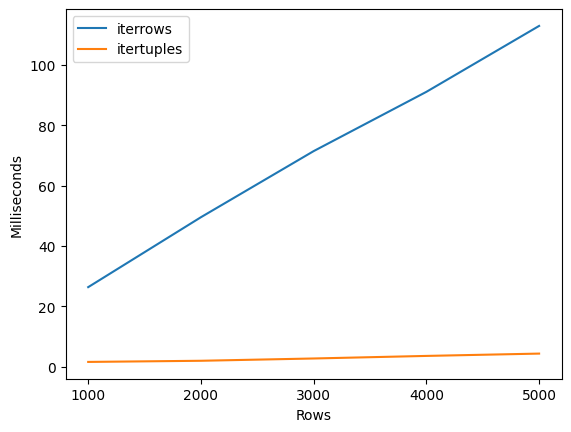

In [38]:
#Q30
def rand_df(rows):
    return pandas.DataFrame(np.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])
hi = {}
i = 1000
while i <= 5000:
    df5 = rand_df(i)
    t0 = time.time()
    # HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
    for row in df5.iterrows():
        pass
    t1 = time.time()
    hi[i] = t1-t0
    i += 1000
he = {}
j = 1000
while j <= 5000:
    df5 = rand_df(j)
    t0 = time.time()
    # HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
    for row in df5.itertuples():
        pass
    t1 = time.time()
    he[j] = t1-t0
    j += 1000

times_df = pandas.DataFrame(dtype=float)
times_df.at[1000, "iterrows"] = hi[1000] *1000
times_df.at[1000, "itertuples"] = he[1000]*1000
times_df.at[2000, "iterrows"] = hi[2000]*1000
times_df.at[2000, "itertuples"] = he[2000]*1000
times_df.at[3000, "iterrows"] = hi[3000]*1000
times_df.at[3000, "itertuples"] = he[3000]*1000
times_df.at[4000, "iterrows"] = hi[4000]*1000
times_df.at[4000, "itertuples"] = he[4000]*1000
times_df.at[5000, "iterrows"] = hi[5000]*1000
times_df.at[5000, "itertuples"] = he[5000]*1000
gr = times_df.plot.line(xticks = [1000, 2000, 3000, 4000, 5000])
gr.set_xlabel("Rows")
gr.set_ylabel("Milliseconds")

Text(0, 0.5, 'Milliseconds')

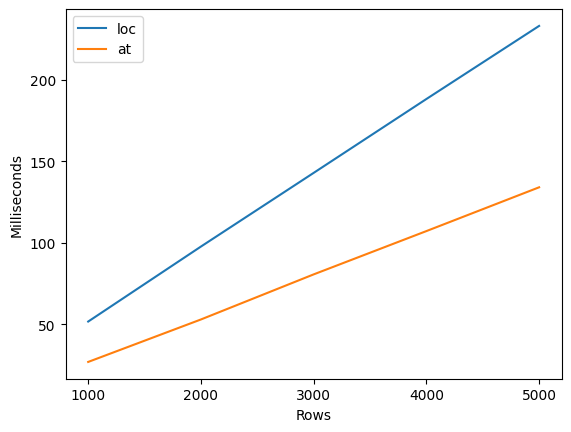

In [39]:
#Q31
gh = {}
total = 0
i = 1000
while i <= 5000:
    df7 = rand_df(i)
    t0 = time.time()
    for idx in df7.index:
        for col in df7.columns:
            total += df7.loc[idx, col]
    t1 = time.time()
    gh[i] = t1-t0
    i += 1000
gg = {}
total = 0
i = 1000
while i <= 5000:
    df7 = rand_df(i)
    t0 = time.time()
    for idx in df7.index:
        for col in df7.columns:
            total += df7.at[idx, col]
    t1 = time.time()
    gg[i] = t1-t0
    i += 1000

times_df1 = pandas.DataFrame(dtype=float)
times_df1.at[1000, "loc"] = gh[1000] *1000
times_df1.at[1000, "at"] = gg[1000]*1000
times_df1.at[2000, "loc"] = gh[2000]*1000
times_df1.at[2000, "at"] = gg[2000]*1000
times_df1.at[3000, "loc"] = gh[3000]*1000
times_df1.at[3000, "at"] = gg[3000]*1000
times_df1.at[4000, "loc"] = gh[4000]*1000
times_df1.at[4000, "at"] = gg[4000]*1000
times_df1.at[5000, "loc"] = gh[5000]*1000
times_df1.at[5000, "at"] = gg[5000]*1000
gra = times_df1.plot.line(xticks = [1000, 2000, 3000, 4000, 5000])
gra.set_xlabel("Rows")
gra.set_ylabel("Milliseconds")

Text(0, 0.5, 'Milliseconds')

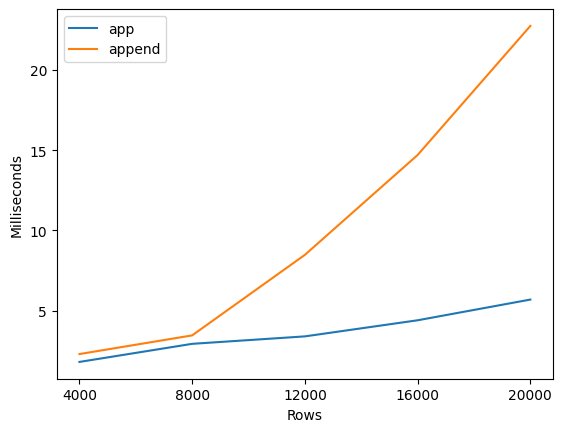

In [40]:
#Q32
def laugh(x):
    return "qwerty" * x
app = {}
i = 4000
while i <= 20000:
    df = rand_df(i)
    t0 = time.time()
    result = df["A"].apply(laugh).tolist()
    t1 = time.time()
    app[i] = t1-t0
    i += 4000

j = 4000
append = {}
while j <= 20000:
    df = rand_df(j)
    t0 = time.time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time.time()
    append[j] = t1-t0
    j += 4000

tidf = pandas.DataFrame(dtype=float)
tidf.at[4000, "app"] = app[4000] *1000
tidf.at[4000, "append"] = append[4000]*1000
tidf.at[8000, "app"] = app[8000]*1000
tidf.at[8000, "append"] = append[8000]*1000
tidf.at[12000, "app"] = app[12000]*1000
tidf.at[12000, "append"] = append[12000]*1000
tidf.at[16000, "app"] = app[16000]*1000
tidf.at[16000, "append"] = append[16000]*1000
tidf.at[20000, "app"] = app[20000]*1000
tidf.at[20000, "append"] = append[20000]*1000

grapple = tidf.plot.line(xticks = [4000, 8000, 12000, 16000, 20000])
grapple.set_xlabel("Rows")
grapple.set_ylabel("Milliseconds")